#### E-Commerce Hypothesis Analysis

In [25]:
# E-commerce companies want to know:

# Do discounts increase customer spending?
# Do coupon users give better ratings?
# Do discounted orders get more positive reviews?

In [26]:
# Hypothesis 1: Discount vs Order Value

# H₀: Discounts do not affect total order value
# H₁: Discounts increase total order value

# Hypothesis 2: Coupon Usage vs Review Score

# H₀: Coupon users and non-coupon users give similar ratings
# H₁: Coupon users give different ratings

# Hypothesis 3: Discounted Orders vs Non-Discounted Orders

# H₀: Discounts do not impact customer satisfaction
# H₁: Discounted orders improve customer satisfaction

##### STEP 1: Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, pearsonr


##### STEP 2: Load Datasets

In [32]:
orders = pd.read_csv("orders.csv")
items = pd.read_csv("order_items.csv")
payments = pd.read_csv("order_payments.csv")
reviews = pd.read_csv("order_reviews.csv")

print(orders.shape)
print(items.shape)
print(payments.shape)
print(reviews.shape)

df = orders.merge(items, on='order_id', how='inner')
df = df.merge(payments, on='order_id', how='inner')
df = df.merge(reviews, on='order_id', how='inner')

print(df.columns)



(99441, 8)
(112650, 7)
(103886, 5)
(99224, 7)
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')


##### STEP 3: CALCULATE TOTAL PRICE & DISCOUNT

In [33]:
# price → original product price
# freight_value → shipping cost
# payment_value → final amount paid

# discount = (price + freight_value) − payment_value

df['total_price'] = df['price'] + df['freight_value']
df['discount_amount'] = df['total_price'] - df['payment_value']




##### STEP 4: CREATE DISCOUNT FLAG (OFFER / COUPON)

In [ ]:
df['discount_applied'] = df['discount_amount'].apply(
    lambda x: 1 if x > 0 else 0
)



##### STEP 5: CLEAN DATA

In [35]:
df = df[['payment_value',
         'review_score',
         'discount_amount',
         'discount_applied']]

df = df.dropna()


Correlation: -0.698679486440427
P-value: 0.0
Reject H0: Discount amount significantly affects payment value


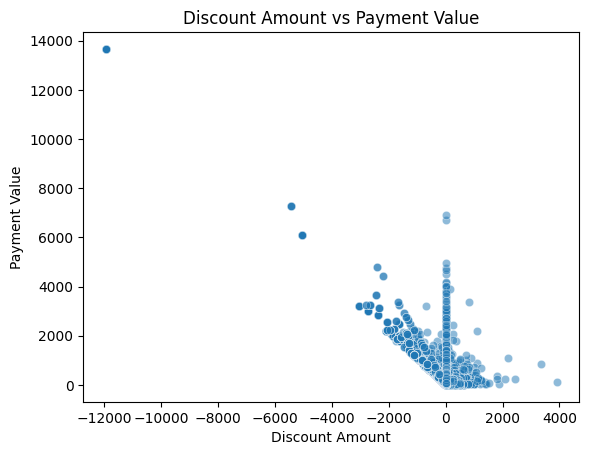

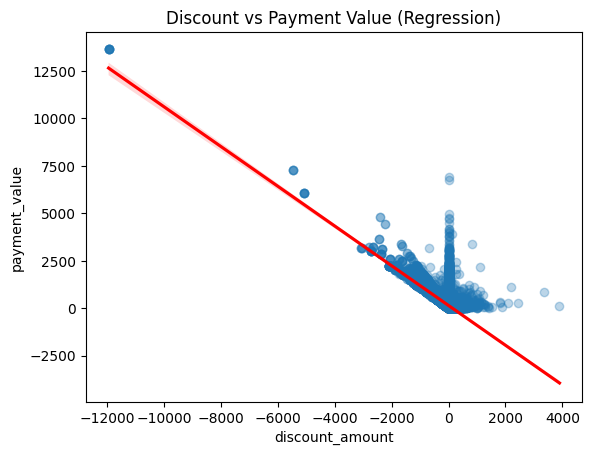

In [41]:
# HYPOTHESIS 1
# Discount Amount vs Payment Value

corr, p_value = pearsonr(
    df['discount_amount'],
    df['payment_value']
)

print("Correlation:", corr)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: Discount amount significantly affects payment value")
else:
    print("Fail to reject H0: Discount amount does not significantly affect payment value")

sns.scatterplot(
    x='discount_amount',
    y='payment_value',
    data=df,
    alpha=0.5
)

plt.title("Discount Amount vs Payment Value")
plt.xlabel("Discount Amount")
plt.ylabel("Payment Value")
plt.show()

sns.regplot(
    x='discount_amount',
    y='payment_value',
    data=df,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)

plt.title("Discount vs Payment Value (Regression)")
plt.show()


T-statistic: 7.199276985948472
P-value: 6.25154018551386e-13
Reject H0: Discounts affect customer satisfaction


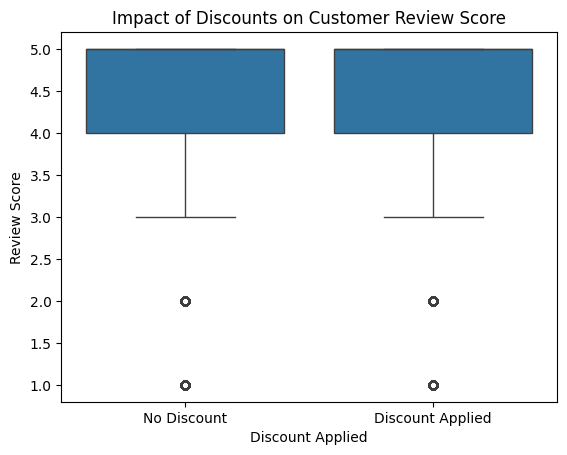

In [42]:
# HYPOTHESIS 2
# Discount / Coupon vs Review Score

discount_users = df[df['discount_applied'] == 1]['review_score']
non_discount_users = df[df['discount_applied'] == 0]['review_score']

t_stat, p_val = ttest_ind(
    discount_users,
    non_discount_users,
    equal_var=False
)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject H0: Discounts affect customer satisfaction")
else:
    print("Fail to reject H0: Discounts do not affect customer satisfaction")


sns.boxplot(
    x='discount_applied',
    y='review_score',
    data=df
)

plt.xticks([0, 1], ['No Discount', 'Discount Applied'])
plt.xlabel("Discount Applied")
plt.ylabel("Review Score")
plt.title("Impact of Discounts on Customer Review Score")
plt.show()
